In [110]:
from math import sin, cos, pi, exp
import matplotlib.pyplot
# jupyter nbextension enable --py widgetsnbextension
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from numpy.fft import rfft, irfft
from numpy import absolute, arange, append
import numpy


### Why you cannot directly use a filter shape you made in the frequency domain

Length of frequency response: 257


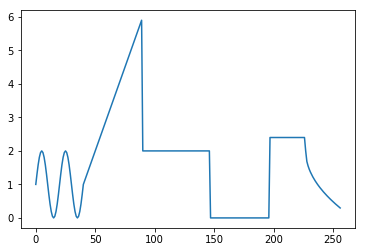

In [111]:
# Here's a weird frequency response we want to use as a filter, in polar mag
crazy_freq_curve = [sin(2*pi*i)+1 for i in arange(0, 2.00, .05)]
crazy_freq_curve += [2*x+1 for x in arange(0, 2.5, .05)]
crazy_freq_curve += [2 for x in arange(0, 2.85, .05)]
crazy_freq_curve += [0 for x in arange(0, 2.5, .05)]
crazy_freq_curve += [2.4 for x in arange(0, 2.91, .1)]
crazy_freq_curve += [-x**.5+2 for x in arange(0, 3, .1)]
phase = [0] * len(crazy_freq_curve)

print(f"Length of frequency response: {len(crazy_freq_curve)}") 
matplotlib.pyplot.plot(crazy_freq_curve)
matplotlib.pyplot.show()

### Let's convert the frequency to time-domain...

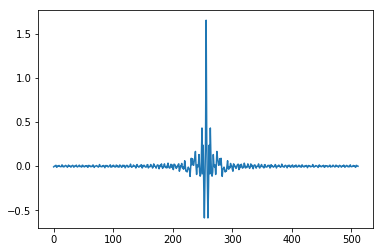

In [112]:
def polar_to_rect(mag, phase):
    from math import sin, cos

    real = []
    imag = []
    for m, p in zip(mag, phase):
        real.append(m * cos(p))
        imag.append(m * sin(p))

    return real, imag
# guess what it didn't change cuz we just said 0 phase
real, imag = polar_to_rect(crazy_freq_curve, phase)
#print(real, imag)

time_of_crazy_freq_curve = irfft(real)

time_len = len(time_of_crazy_freq_curve)
time_of_crazy_freq_curve = append(time_of_crazy_freq_curve[time_len//2:], time_of_crazy_freq_curve[0:time_len//2])

matplotlib.pyplot.plot(time_of_crazy_freq_curve)
matplotlib.pyplot.show()


### ...then zero pad it, then FFT it

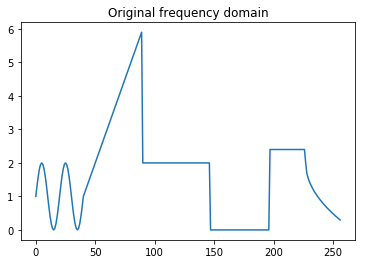

<function __main__.pad_and_plot>

In [113]:
matplotlib.pyplot.title("Original frequency domain")
#matplotlib.pyplot.yscale('log')

matplotlib.pyplot.plot(crazy_freq_curve)
matplotlib.pyplot.show()

def pad_and_plot(num_pad):
    global time_of_crazy_freq_curve # I have become a monster
    time_of_crazy_freq_curve_pad = append(time_of_crazy_freq_curve, [0] * num_pad)
    print(f"Length of time domain signal: {len(time_of_crazy_freq_curve_pad)}") 
    crazy_freq_curve_finer_res = rfft(time_of_crazy_freq_curve_pad)

    matplotlib.pyplot.title("Zero padded time domain -> frequency")
    #matplotlib.pyplot.yscale('log')
    matplotlib.pyplot.plot(absolute(crazy_freq_curve_finer_res)) # Back to polar mag
    matplotlib.pyplot.show()

"""
Frequencies not defined by original ideal filter (between each index) will
become crazy and oscillate like this
"""
interact(pad_and_plot, num_pad=(0,2048,1))


### Let's see what happens when you apply a window to time domain

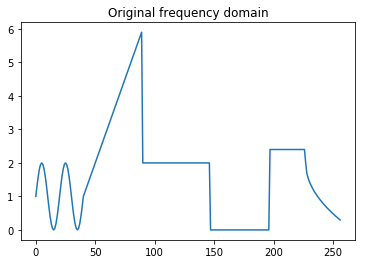

In [114]:
def blackman(M):
    h = []
    for i in range(0,M+1):
        blackman = 0.42 - 0.5*cos(2*pi*i/M) + 0.08*cos(4*pi*i/M)
        h.append(blackman)

    return h

def pad_and_plot_blackman_before(num_pad):
    global time_of_crazy_freq_curve # I have become a monster
    bman = blackman(len(time_of_crazy_freq_curve))
    windowed_time = [t*b for t,b in zip(time_of_crazy_freq_curve, bman)]
    
    time_of_crazy_freq_curve_pad = append(windowed_time, [0] * num_pad)
    print(f"Length of time domain signal: {len(time_of_crazy_freq_curve_pad)}") 
    
    crazy_freq_curve_finer_res = rfft(time_of_crazy_freq_curve_pad)
    
    matplotlib.pyplot.title("Zero padded time domain+blackman -> frequency")
    matplotlib.pyplot.plot(absolute(crazy_freq_curve_finer_res)) # Back to polar mag
    matplotlib.pyplot.show()

interact(pad_and_plot_blackman_before, num_pad=(0,2048,1))

matplotlib.pyplot.title("Original frequency domain")
matplotlib.pyplot.plot(crazy_freq_curve)
matplotlib.pyplot.show()

# NOTE: We never truncated the signal in this example

In [115]:
# When you replot the above three the web browser moves because the length of the page changes. It is annoying.
#BUFFER
#BUFFER
#BUFFER
#BUFFER
#BUFFER
#BUFFER
#BUFFER
#BUFFER
#BUFFER
#BUFFER
#BUFFER
#BUFFER
#BUFFER
#BUFFER
#BUFFER
#BUFFER
#BUFFER
#BUFFER
#BUFFER
#BUFFER
#BUFFER
#BUFFER
#BUFFER
#BUFFER

#BUFFER
#BUFFER
#BUFFER
#BUFFER
#BUFFER
#BUFFER
#BUFFER
#BUFFER
#BUFFER
#BUFFER
#BUFFER
#BUFFER
#BUFFER
#BUFFER
#BUFFER
#BUFFER
#BUFFER
#BUFFER
#BUFFER
#BUFFER
#BUFFER
#BUFFER
#BUFFER
#BUFFER

